#**Control 3**

##Setup

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1mGxfX7NKoKxlpaQxvCZzq6niLpf3Ziaq

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1mGxfX7NKoKxlpaQxvCZzq6niLpf3Ziaq
From (redirected): https://drive.google.com/uc?id=1mGxfX7NKoKxlpaQxvCZzq6niLpf3Ziaq&confirm=t&uuid=a7fdad04-b327-49a8-b259-4bb577207992
To: /content/VW_VOTARON_2020PLEB_Datos_completos.zip
100% 42.0M/42.0M [00:00<00:00, 60.4MB/s]


In [ ]:
!unzip "VW_VOTARON_2020PLEB_Datos_completos.zip"

Archive:  VW_VOTARON_2020PLEB_Datos_completos.zip
  inflating: VW_VOTARON_2020PLEB_Datos completos.csv  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('VW_VOTARON_2020PLEB_Datos completos.csv', sep=';')

In [ ]:
work_df = df.copy(deep=True)
work_df['index'] = np.arange(1, df.shape[0] + 1)
work_df

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron,index
0,0,Coyhaique,Coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0,1
1,0,El Puerto,Valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN,2
2,0,Iquique,Iquique,0,99,chilena,Chile,Chile,SIN PARTIDO,Iquique,80 o +,De Tarapaca,masculino,no sufragó,Nacional,1,NaN,3
3,0,Rio Tranquilo,Rio Ibañez,0,22,chilena,Chile,Chile,SIN PARTIDO,General Carrera,20-24,De Aysen Del General Carlos Ibañez Del Campo,masculino,sufragó,Nacional,1,1.0,4
4,0,El Puerto,Valparaiso,0,95,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,masculino,no sufragó,Nacional,1,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14855714,0,Quilpue,Quilpue,0,21,chilena,Chile,Chile,SIN PARTIDO,Marga Marga,20-24,De Valparaiso,masculino,sufragó,Nacional,1,1.0,14855715
14855715,0,Quilpue,Quilpue,0,21,chilena,Chile,Chile,SIN PARTIDO,Marga Marga,20-24,De Valparaiso,masculino,sufragó,Nacional,1,1.0,14855716
14855716,0,Quilpue,Quilpue,0,21,chilena,Chile,Chile,SIN PARTIDO,Marga Marga,20-24,De Valparaiso,masculino,sufragó,Nacional,1,1.0,14855717
14855717,0,Quilpue,Quilpue,0,21,chilena,Chile,Chile,SIN PARTIDO,Marga Marga,20-24,De Valparaiso,masculino,sufragó,Nacional,1,1.0,14855718


##Pregunta 1
**Para este control trabajaremos con una base de datos real (anonimizada) del SERVEL acerca del plebiscito, he indica si cada ciudadano voto o no en el plebiscito del 2020.**

###a)
Reemplace en la columna 'Votaron' los NaN por 0.

In [ ]:
print(work_df['Votaron'].isnull().sum())
work_df['Votaron'] = work_df['Votaron'].fillna(0)
print(work_df['Votaron'].isnull().sum())

7313660
0


###b)
Calcule el tamaño del padrón electoral y de los votantes por primera vez.

In [ ]:
print(f"El padron tiene un tamaño de {work_df.shape[0]} personas")
print(f"De los cuales {work_df[work_df['Edad'] <= 20].shape[0]} personas son votantes por primera vez")

El padron tiene un tamaño de 14855719 personas
De los cuales 743696 personas son votantes por primera vez


###c)
¿Cuántas personas votaron y no votaron por rango de edad?


In [ ]:
cuenta = 0
rangos_edad = work_df['Rango Edad'].unique()
rangos_edad.sort(axis=0)
for i in rangos_edad:
  rango_de_edad = work_df[work_df['Rango Edad'] == i]
  print(f"El rango de edad {i} tiene:\n")
  print(f"{rango_de_edad[rango_de_edad['Votaron'] == 1].shape[0]} votantes")
  print(f"{rango_de_edad[rango_de_edad['Votaron'] == 0].shape[0]} no votantes\n")
  cuenta += rango_de_edad[rango_de_edad['Votaron'] == 1].shape[0] + rango_de_edad[rango_de_edad['Votaron'] == 0].shape[0]
print(cuenta)

El rango de edad 18 a 19 tiene:

276790 votantes
215856 no votantes

El rango de edad 20-24 tiene:

741284 votantes
559645 no votantes

El rango de edad 25-29 tiene:

807167 votantes
636213 no votantes

El rango de edad 30-34 tiene:

789293 votantes
679407 no votantes

El rango de edad 35-39 tiene:

675788 votantes
659480 no votantes

El rango de edad 40-44 tiene:

617406 votantes
622689 no votantes

El rango de edad 45-49 tiene:

663863 votantes
649640 no votantes

El rango de edad 50-54 tiene:

671790 votantes
612176 no votantes

El rango de edad 55-59 tiene:

684419 votantes
580939 no votantes

El rango de edad 60-64 tiene:

572248 votantes
489272 no votantes

El rango de edad 65-69 tiene:

425266 votantes
403576 no votantes

El rango de edad 70-74 tiene:

300992 votantes
346931 no votantes

El rango de edad 75-79 tiene:

184985 votantes
300216 no votantes

El rango de edad 80 o + tiene:

130768 votantes
557620 no votantes

14855719


###d)
¿Cuántas personas  por partido votaron vs los que no votaron? (incluya los SIN PARTIDO)

In [ ]:
cuenta = 0
partidos = work_df['Partido'].unique()
partidos.sort(axis=0)
for i in partidos:
  partido = work_df[work_df['Partido'] == i]
  print(f"El partido {i} tiene:\n")
  print(f"{partido[partido['Votaron'] == 1].shape[0]} votantes")
  print(f"{partido[partido['Votaron'] == 0].shape[0]} no votantes")
  print(f"Estos se traduce en un {round(100 * partido[partido['Votaron'] == 1].shape[0] / partido.shape[0], 2)}% de votantes en el partido\n")
  cuenta += partido[partido['Votaron'] == 1].shape[0] + partido[partido['Votaron'] == 0].shape[0]
print(cuenta)

El partido SIN PARTIDO tiene:

6970350 votantes
6995102 no votantes
Estos se traduce en un 49.91% de votantes en el partido

El partido [126] NUEVO TIEMPO tiene:

1115 votantes
551 no votantes
Estos se traduce en un 66.93% de votantes en el partido

El partido [130] FEDERACION REGIONALISTA VERDE SOCIAL tiene:

7937 votantes
5213 no votantes
Estos se traduce en un 60.36% de votantes en el partido

El partido [135] PARTIDO TRABAJADORES REVOLUCIONARIOS tiene:

1826 votantes
1256 no votantes
Estos se traduce en un 59.25% de votantes en el partido

El partido [137] PARTIDO LIBERAL DE CHILE tiene:

6696 votantes
3604 no votantes
Estos se traduce en un 65.01% de votantes en el partido

El partido [138] CIUDADANOS tiene:

12374 votantes
6870 no votantes
Estos se traduce en un 64.3% de votantes en el partido

El partido [139] PARTIDO PROGRESISTA DE CHILE tiene:

37346 votantes
23377 no votantes
Estos se traduce en un 61.5% de votantes en el partido

El partido [140] REGIONALISTA INDEPENDIENTE D

###e)
¿Cuantos chilenos del padrón nacieron en chile?

In [ ]:
print(f"{work_df[work_df['Pais Nacimiento'] == 'Chile'].shape[0]} personas del padron nacieron en Chile")
print(f"{work_df[work_df['Pais Nacimiento'] != 'Chile'].shape[0]} personas del padron nacieron fuera de Chile")
print(work_df[work_df['Pais Nacimiento'] == 'Chile'].shape[0] + work_df[work_df['Pais Nacimiento'] != 'Chile'].shape[0])

14476890 personas del padron nacieron en Chile
378829 personas del padron nacieron fuera de Chile
14855719


###f)
¿Cuantas comunas y circunscripciones hay en Chile?

In [ ]:
print(f"Existe {work_df[work_df['VotoExterior'] == 'Nacional']['Comuna'].unique().shape[0]} comunas en Chile")
print(f"Existe {work_df[work_df['VotoExterior'] == 'Nacional']['Circunscripcion'].unique().shape[0]} circunscripciones en Chile")

Existe 346 comunas en Chile
Existe 681 circunscripciones en Chile


###g)
Entregue un gráfico (matplotlib.pyplot) que indique el número de personas que votaron y los que no por percentil de edad

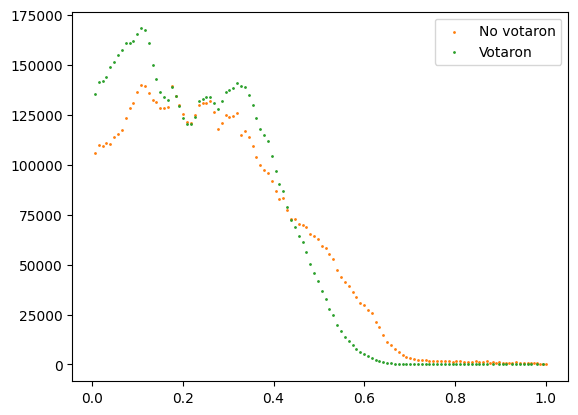

In [ ]:
import matplotlib.pyplot as plt

graph_df = work_df[['index','Edad', 'Votaron']].copy(deep=True)
graph_df = graph_df.groupby(by=['Edad', 'Votaron']).count().reset_index().sort_values(by='Edad')
graph_df['Percentil'] = graph_df['Edad'].rank(pct=True)

scatter_x1 = graph_df[graph_df['Votaron'] == 0]['Percentil']
scatter_x2 = graph_df[graph_df['Votaron'] == 1]['Percentil']
scatter_y1 = graph_df[graph_df['Votaron'] == 0]['index']
scatter_y2 = graph_df[graph_df['Votaron'] == 1]['index']
group = graph_df['Votaron']

fig, ax = plt.subplots()
ax.scatter(scatter_x1, scatter_y1, color = 'C1', label = 'No votaron', s = 1)
ax.scatter(scatter_x2, scatter_y2, color = 'C2', label = 'Votaron', s = 1)
ax.legend()
plt.show()

In [ ]:
graph_df

,Edad,Votaron,index,Percentil
0,18,0.0,106117,0.006356
1,18,1.0,135618,0.006356
2,19,0.0,109739,0.014831
3,19,1.0,141172,0.014831
4,20,0.0,109185,0.023305
...,...,...,...,...
230,135,0.0,811,0.980932
232,136,0.0,467,0.987288
234,137,1.0,2,0.993644
233,137,0.0,269,0.993644


##Pregunta 2: Índices, algoritmos y transacciones

Para esta pregunta considere la tabla Persona(id int, nombre VARCHAR(100), edad int)

###a\)

Es natural pensar que la edad pueda tener valores repetidos para distintas personas.


*   Explique cómo se puede hacer que un B+Tree pueda indexar el atributo edad de la relación Persona.
*   Mencione cómo cambian los costos de busqueda para consultas de igualdad y rango.



Hint: piense en las overflow pages del Hash.

**Solución**

El B+Tree explicado en clases no está preparado para trabajar con duplicados. Una posible solución que al llegar a las hojas nos encontremos con un puntero a una lista de punteros (que se almacenan en una página de disco) en vez de un puntero a la tupla. Si un valor llega a tener muchos duplicados y los punteros no caben en una página tenemos que utilizar overflow pages.

Para las consultas de igualdad aparte de bajar por el árbol debemos considerar recorrer todas las overflow pages del valor.
Para las consultas de rango debemos considerar las overflow pages de todos los valores en el rango. Dado que el índice es unclustered debemos seguir sumando la cardinalidad del output de la consulta.

20 puntos

###b)

Suponga que en esta relación la primary key está indexada con un B+Tree unclustered, mientras que la edad está indexada con un Hash Index clustered. La relación tiene 1 millón de tuplas y la columna id posee los valores del 0 al 999999. En cada página caben 50 tuplas y 200 punteros. El árbol es de altura h y las hojas están ocupadas al 75%. El Hash Index tiene una página por bucket (i.e. es suficientemente grande y no tiene overflow pages), y cada edad va a parar a un bucket distinto.

Indique el costo en I/O de las siguientes consultas:

####1.	SELECT * FROM Persona WHERE id=5555

**Solución**

h+2. o h+1

2 puntos

####2.	SELECT * FROM Persona WHERE id=55552.	SELECT * FROM Persona WHERE nombre=’John Doe’

**Solución**

20000, porque se recorre la relación entera

2 puntos

####3.	SELECT * FROM Persona WHERE edad=55

**Solución**

1

2 puntos

####4.	SELECT * FROM Persona WHERE id < 100000

**Solución**

h + ⌈100.000/200⌉ + 100.000

2 puntos

####5.	SELECT * FROM Persona WHERE edad>=25 and edad < 55

**Solución**

30

2 puntos

##Pregunta 3: Transacciones y logs

###a) Redo Logging
Suponga que su sistema tuvo una falla. Al reiniciar el sistema, el sistema se encuentra con el log file que se muestra a continuación, en la tabla “Log Redo”. Suponiendo que la política de recovery es la de Redo Logging, indique:

|        Log Redo        |
| ---------------------- |
|      \<START T1>       |
|      \<T1, a, 1>       |
|      \<COMMIT T1>      |
|      \<START T2>       |
|      \<T2, b, 10>      |
|      \<T2, c, 20>      |
|      \<START T3>       |
|      \<T3, a, 15>      |
| \<START CKPT (T2, T3)> |
|      \<T3, d, 23>      |
|      \<START T4>       |
|      \<END CKPT>       |
|      \<COMMIT T3>      |
|      \<T4, e, 11>      |


####i.	Desde qué parte del log debo comenzar el proceso de redo.


**Solución**

Comienza desde <START CKPT (T2, T3)>

3 puntos

####ii.	Qué variables deben rehacer sus cambios y cuál es el valor con el que quedarán.

**Solución**

a debe rehacerse con  15 por T3
b debe rehacerse con  10 por T2
c debe rehacerse con  20 por T2
d debe rehacerse con  23 por T3
e debe rehacerse con  11 por T4

4 puntos

####iii.	Qué variables (de las que aparecen en el log) no son cambiadas en el proceso.

**Solución**

Solo a en T1, aunque después se modifica en T3

3 puntos

####iv.	Si no hubiesemos encontrado la línea <END CKPT>, ¿desde qué parte del log debería comenzar el proceso de redo?. Justifique su respuesta explicando qué significa no haber encontrado un \<END CKPT>.

**Solución**

Desde el inicio del Log o desde el último checkpoint terminado (en este log no hay). Si no hay end significa que el checkpoint no terminó.

4 puntos

###b)
A continuación hay dos transacciones T1 y T2 en las cuales A, B y C son tres valores distintos en la base de datos.

|    T1       |    T2     |
| ----------- | --------- |
|   R(A)      |   R(A)    |
|  W(B, A*2)  | W(A, A-5) |
|   R(C)      |   R(C)    |
| W(C, C-100) | W(C, C+A) |


Donde 'R(A)' representa la lectura del valor 'A', y 'W(A,B)' representa la escritura de 'A' con el valor 'B' (i.e. escribir 'B' en 'A').

Para los siguientes tipos de conflictos indique si es posible que ocurra:

####Escritura-lectura (WR)


**Solución**

No hay, porque en T2 no hay Read (X) luego de un Write (X) en T1

####Lectura-escritura (RW)

**Solución**

No hay, porque  en T1 no hay Write (X)  luego de un Read (X) en T1


####Escritura-escritura (WW)

**Solución**

Si hay porque ambas escriben C en T1 y T2

**1pt por respuesta y 1 pt por justificación en cada item.**